<a href="https://colab.research.google.com/github/AaronP512/track/blob/master/self_driving_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
!git clone https://github.com/AaronP512/track.git

Cloning into 'track'...
remote: Enumerating objects: 26085, done.
remote: Counting objects: 100% (26085/26085), done.
remote: Compressing objects: 100% (26080/26080), done.
remote: Total 26085 (delta 3), reused 26083 (delta 1), pack-reused 0
Receiving objects: 100% (26085/26085), 333.86 MiB | 44.00 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (12164/12164), done.


In [3]:
!ls track

drive.py  driving_log.csv  IMG	model.h5  README.md


In [4]:
!pip3 install numpy==1.15.4

     |████████████████████████████████| 13.9MB 2.8MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.3
    Uninstalling numpy-1.16.3:
      Successfully uninstalled numpy-1.16.3


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D,MaxPooling2D, Dropout, Flatten, Dense
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd
import ntpath
import random
import matplotlib.image as mpimg
import os
from imgaug import augmenters as iaa

Using TensorFlow backend.


In [6]:
datadir = 'track'
columns = ['center', 'left', 'right','steering', 'throttle','reverse','speed']
data=pd.read_csv(os.path.join(datadir,'driving_log.csv'), names= columns)
pd.set_option('display.max_colwidth',-1)
data.head()

center  \
0  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg   

                                                                   left  \
0  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_860.jpg   

                                                                   right  \
0  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_860.jpg   

   steering  throttle  reverse     speed  
0  0.0       0.0       0.0      0.649786  
1  0.0       0.0       0.0      0.627942  
2  0.0       0.0       0.0      0.622910  
3  0.0       0.0       0.0      0.619162  
4  0.0       0.0       0.0      0.615438

In [7]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail
data['center']=data['center'].apply(path_leaf)
data['left']=data['left'].apply(path_leaf)
data['right']=data['right'].apply(path_leaf)
data.head()

center                              left  \
0  center_2018_07_16_17_11_43_382.jpg  left_2018_07_16_17_11_43_382.jpg   
1  center_2018_07_16_17_11_43_670.jpg  left_2018_07_16_17_11_43_670.jpg   
2  center_2018_07_16_17_11_43_724.jpg  left_2018_07_16_17_11_43_724.jpg   
3  center_2018_07_16_17_11_43_792.jpg  left_2018_07_16_17_11_43_792.jpg   
4  center_2018_07_16_17_11_43_860.jpg  left_2018_07_16_17_11_43_860.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2018_07_16_17_11_43_382.jpg  0.0       0.0       0.0      0.649786  
1  right_2018_07_16_17_11_43_670.jpg  0.0       0.0       0.0      0.627942  
2  right_2018_07_16_17_11_43_724.jpg  0.0       0.0       0.0      0.622910  
3  right_2018_07_16_17_11_43_792.jpg  0.0       0.0       0.0      0.619162  
4  right_2018_07_16_17_11_43_860.jpg  0.0       0.0       0.0      0.615438

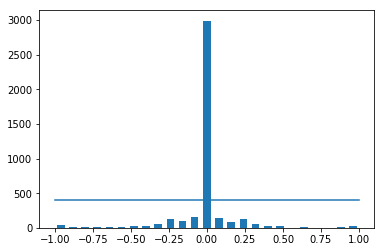

In [8]:
num_bins=25
samples_per_bin = 400
hist,bins=np.histogram(data['steering'], num_bins)
center = (bins[:-1]+bins[1:])*.5
plt.bar(center,hist,width=.05)
plt.plot((np.min(data['steering']),np.max(data['steering'])),(samples_per_bin,samples_per_bin))

total data: 4053
removed: 2590
remaining: 1463


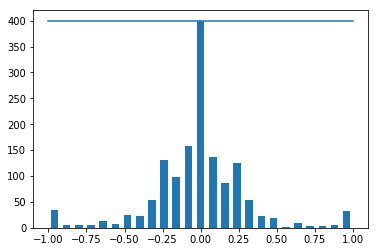

In [9]:
print('total data:',len(data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i]>= bins[j] and data['steering'][i]<=bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

print('removed:', len(remove_list))
data.drop(data.index[remove_list],inplace=True)
print('remaining:', len(data))

hist, _ =np.histogram(data['steering'], (num_bins))
plt.bar(center,hist,width=.05)
plt.plot((np.min(data['steering']),np.max(data['steering'])),(samples_per_bin,samples_per_bin))

In [10]:
print(data.iloc[1])
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0],indexed_data[1],indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

image_paths, steerings=load_img_steering(datadir+'/IMG', data)

center      center_2018_07_16_17_11_44_069.jpg
left        left_2018_07_16_17_11_44_069.jpg  
right       right_2018_07_16_17_11_44_069.jpg 
steering    0                                 
throttle    0                                 
reverse     0                                 
speed       0.601971                          
Name: 7, dtype: object


In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths,steerings, test_size= .2, random_state=6)
print('Training Samples:{}\n Valid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples:1170
 Valid Samples: 293


Text(0.5, 1.0, 'Validation set')

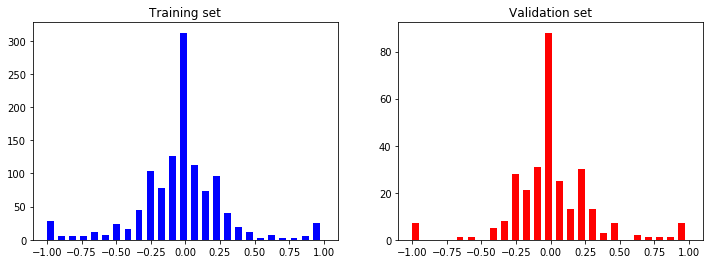

In [12]:
fig, axes=plt.subplots(1,2,figsize=(12,4))
axes[0].hist(y_train, bins= num_bins, width=.05, color = 'blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins= num_bins, width=.05, color = 'red')
axes[1].set_title('Validation set')

In [0]:
def zoom(image):
  zoom=iaa.Affine(scale=(1,1.3))
  image= zoom.augment_image(image)
  return image

Text(0.5, 1.0, 'Zoomed Image')

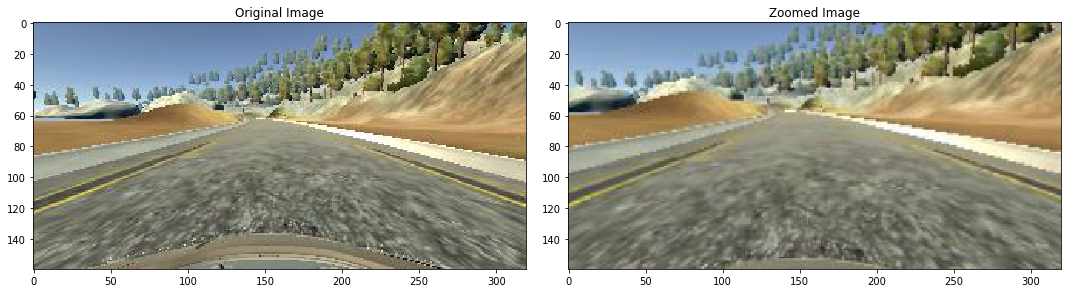

In [14]:
image = image_paths[random.randint(0,1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig,axes=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[1].imshow(zoomed_image)
axes[1].set_title('Zoomed Image')

In [0]:
def pan(image):
  pan=iaa.Affine(translate_percent={'x':(-.1,.1),'y':(-.1,.1)})
  image= pan.augment_image(image)
  return image

Text(0.5, 1.0, 'Panned Image')

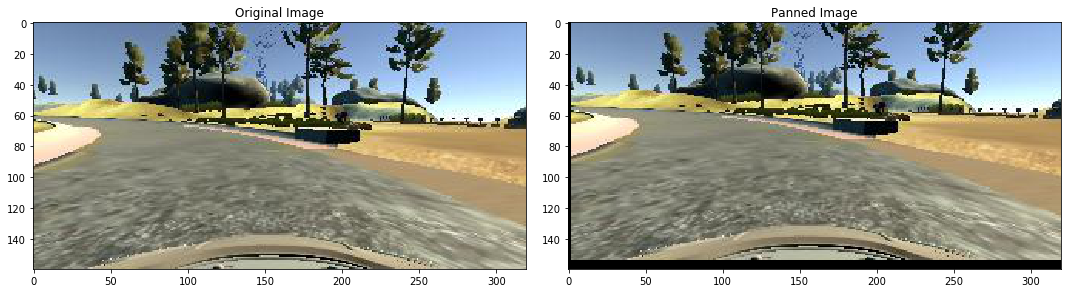

In [16]:
image = image_paths[random.randint(0,1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig,axes=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[1].imshow(panned_image)
axes[1].set_title('Panned Image')

In [0]:
def img_random_brightness(image):
  irb=iaa.Multiply((.2,1.2))
  image= irb.augment_image(image)
  return image

Text(0.5, 1.0, 'Bright Image')

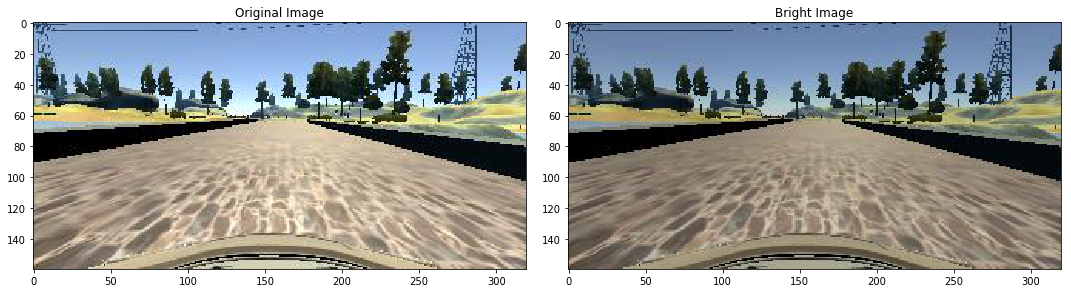

In [18]:
image = image_paths[random.randint(0,1000)]
original_image = mpimg.imread(image)
brightness_image = img_random_brightness(original_image)

fig,axes=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[1].imshow(brightness_image)
axes[1].set_title('Bright Image')

In [0]:
def img_random_flip(image, steering_angle):
  image=cv2.flip(image,1)  
  steering_angle = -steering_angle
  return image,steering_angle

Text(0.5, 1.0, 'Flipped Image - Steering Angle 0.2')

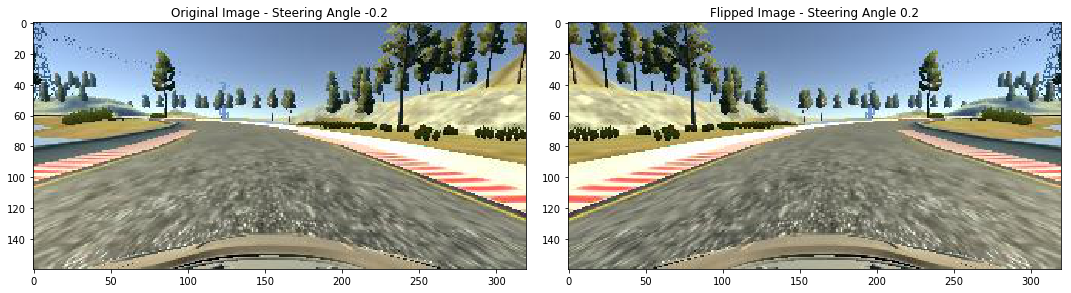

In [20]:
random_index = random.randint(0,1000)
image = image_paths[random_index]
steering_angle=steerings[random_index]

original_image = mpimg.imread(image)
flipped_image,flipped_steering_angle = img_random_flip(original_image, steering_angle)

fig,axes=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original Image - '+'Steering Angle '+str(steering_angle))
axes[1].imshow(flipped_image)
axes[1].set_title('Flipped Image - '+'Steering Angle '+str(flipped_steering_angle))

In [0]:
def random_augment(image, steering_angle):
  image= mpimg.imread(image)
  if np.random.rand()<0.5:
    image = pan(image)
  if np.random.rand()<0.5:
    image = zoom(image)
  if np.random.rand()<0.5:
    image = img_random_brightness(image)  
  if np.random.rand()<0.5:
    image, steering_angle = img_random_flip(image, steering_angle)
  return image, steering_angle

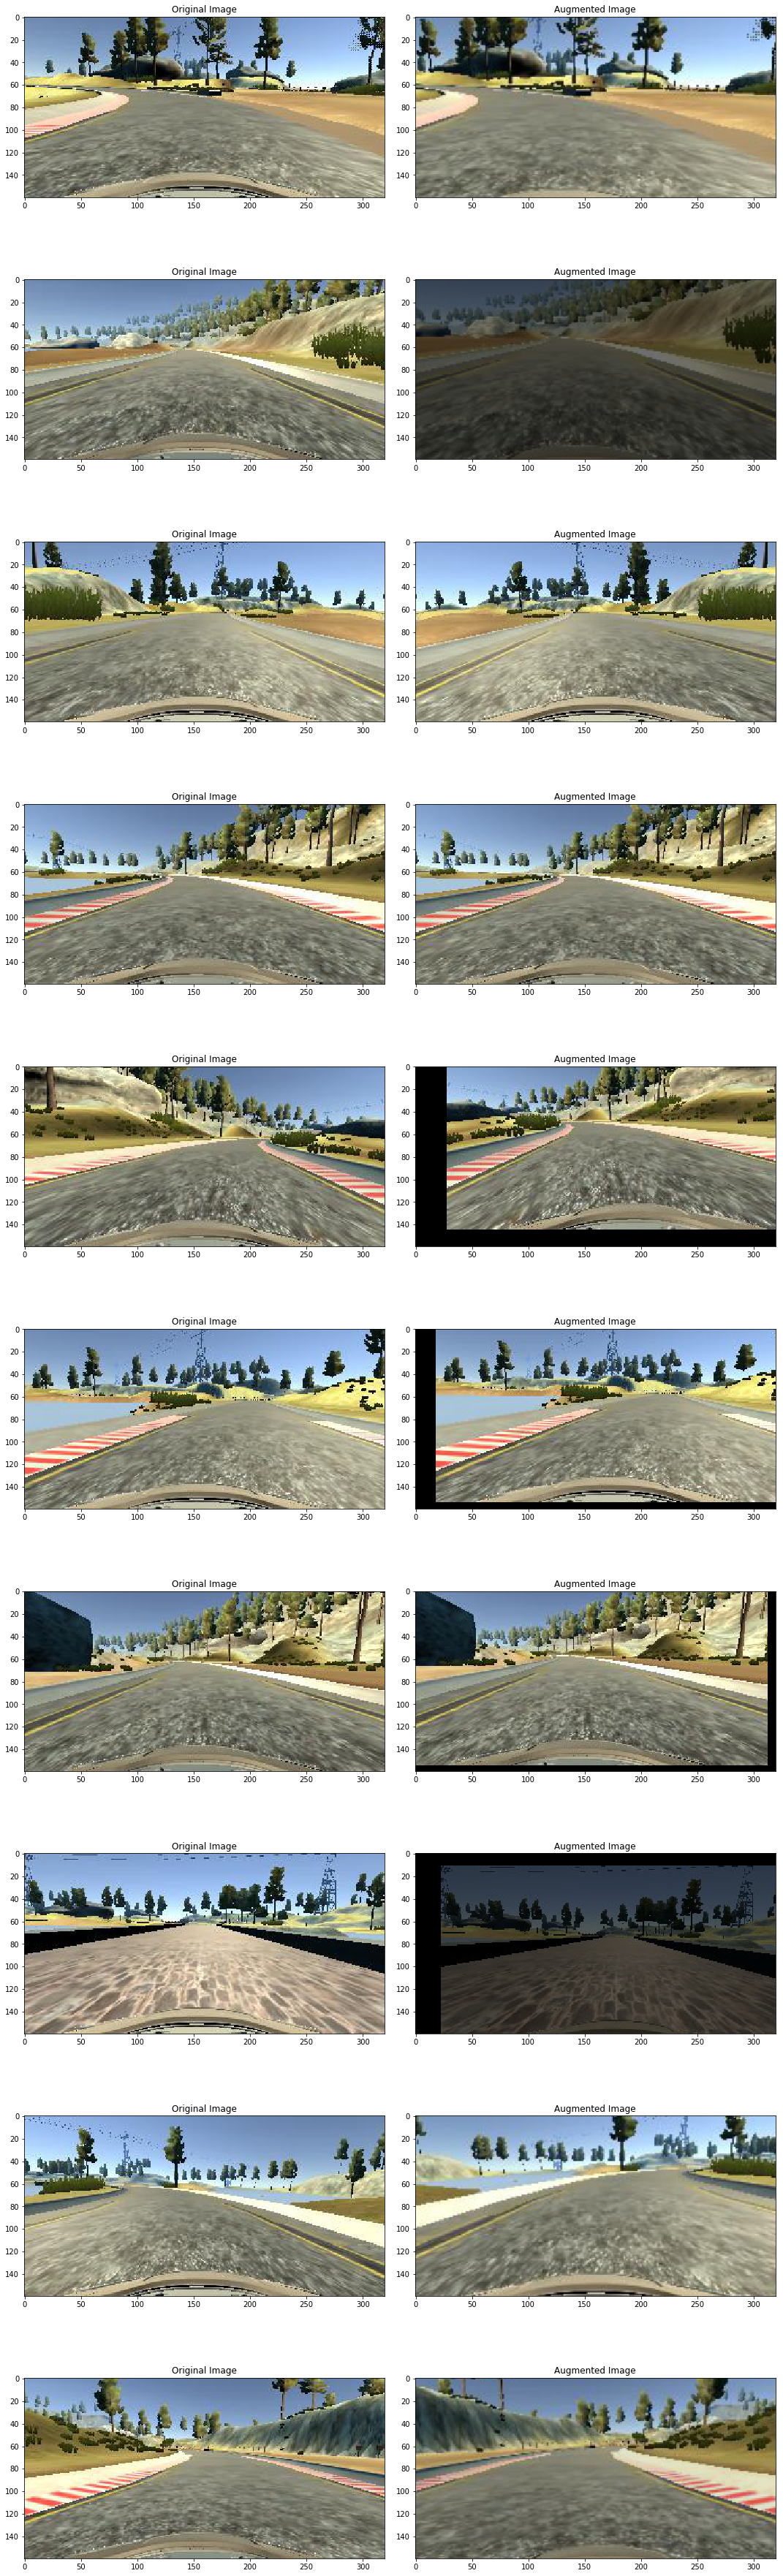

In [22]:
ncol =2
nrow= 10
fig, axes =plt.subplots(nrow, ncol, figsize=(15,50))
fig.tight_layout()

for i in range(10):
  randnum = random.randint(0,len(image_paths)-1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]
  
  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)
  
  axes[i][0].imshow(original_image)
  axes[i][0].set_title('Original Image')
  axes[i][1].imshow(augmented_image)
  axes[i][1].set_title('Augmented Image')
  

In [0]:
def img_preprocess(img):
  img = img[60:135,:,:]
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img,(3,3),0)
  img = cv2.resize(img,(200,66))
  img = img/255
  return img

Text(0.5, 1.0, 'Preprocessed Image')

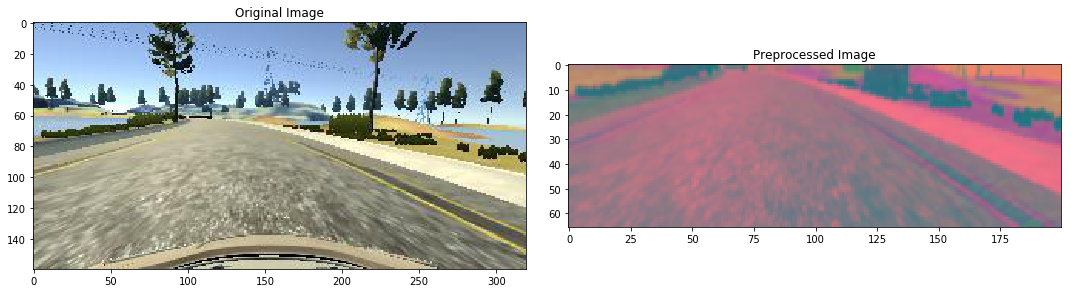

In [24]:
image = image_paths[250]
original_image = mpimg.imread(image)
preprocessed_img= img_preprocess(original_image)
fig,axes=plt.subplots(1,2, figsize=(15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[1].imshow(preprocessed_img)
axes[1].set_title('Preprocessed Image')

In [0]:
def batch_generator(image_paths,steering_ang, batch_size, istraining):
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
      random_index= random.randint(0,len(image_paths)-1)
      if istraining:
        im, steering =random_augment(image_paths[random_index],steering_ang[random_index])

      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]

      im=img_preprocess(im)
      batch_img.append(im) 
      batch_steering.append(steering)
    yield(np.array(batch_img),np.array(batch_steering))

Text(0.5, 1.0, 'Validation Image')

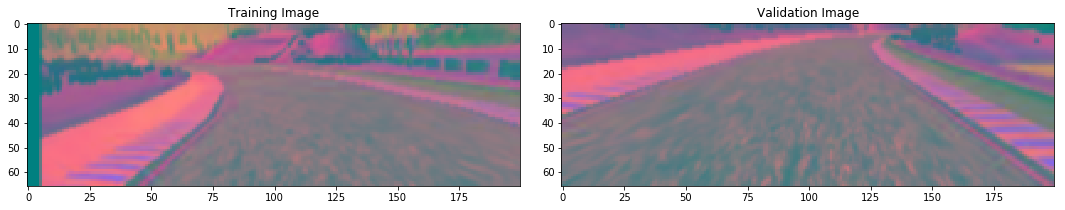

In [26]:
x_train_gen,y_train_gen=next(batch_generator(X_train,y_train,1,1))
x_valid_gen,y_valid_gen=next(batch_generator(X_valid,y_valid,1,0))

fig,axes=plt.subplots(1,2, figsize=(15,10))
fig.tight_layout()
axes[0].imshow(x_train_gen[0])
axes[0].set_title('Training Image')
axes[1].imshow(x_valid_gen[0])
axes[1].set_title('Validation Image')

In [0]:
def nvidia_model():
  model = Sequential()
  model.add(Convolution2D(24,5,5,subsample=(2,2),input_shape=(66,200,3), activation='elu'))
  model.add(Convolution2D(36,5,5,subsample=(2,2),activation='elu'))
  model.add(Convolution2D(48,5,5,subsample=(2,2),activation='elu'))
  model.add(Convolution2D(64,3,3,activation='elu'))
  model.add(Convolution2D(64,3,3,activation='elu'))
#   model.add(Dropout(0.5))
  
  model.add(Flatten())
  model.add(Dense(100,activation='elu'))
#   model.add(Dropout(0.5))
  
  model.add(Dense(50,activation='elu'))
#   model.add(Dropout(0.5))
  model.add(Dense(10,activation='elu'))
#   model.add(Dropout(0.5))
  model.add(Dense(1))
  
  optimizer =Adam(lr=1e-4)
  model.compile(loss='mse', optimizer=optimizer)
  return model  

In [28]:
model = nvidia_model()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), act

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               115300    
__________

In [29]:
history=model.fit_generator(batch_generator(X_train,y_train,100,1),                            
                            steps_per_epoch=300, 
                            epochs=10,
                            validation_data=batch_generator(X_valid,y_valid,100,0),
                            validation_steps=200,
                            verbose=1, 
                            shuffle=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
300/300 [==============================] - 132s 439ms/step - loss: 0.0823 - val_loss: 0.0563
Epoch 2/10
300/300 [==============================] - 128s 428ms/step - loss: 0.0621 - val_loss: 0.0502
Epoch 3/10
300/300 [==============================] - 128s 428ms/step - loss: 0.0595 - val_loss: 0.0499
Epoch 4/10
300/300 [==============================] - 127s 423ms/step - loss: 0.0537 - val_loss: 0.0498
Epoch 5/10
300/300 [==============================] - 130s 432ms/step - loss: 0.0476 - val_loss: 0.0391
Epoch 6/10
300/300 [==============================] - 126s 420ms/step - loss: 0.0482 - val_loss: 0.0367
Epoch 7/10
300/300 [==============================] - 128s 427ms/step - loss: 0.0452 - val_loss: 0.0397
Epoch 8/10
300/300 [==============================] - 127s 425ms/step - loss: 0.0420 - val_loss: 0.0372
Epoch 9/10
300/300 [==============================] - 127s 424ms/step - loss: 0.0407 - val_loss: 0.0346
Epoch 10/10
300/

Text(0.5, 0, 'Epoch')

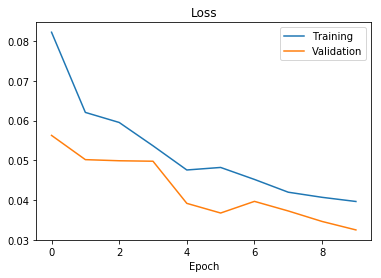

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [0]:
model.save('model.h5')

In [0]:
from google.colab import files
files.download('model.h5')